# 1. Bases de datos utilizadas

In [298]:
import pandas as pd
ruta_archivo = 'todo.xlsx'
audita1 = 'audita'
finanzas1 = 'finanzas'
bajas1 = 'bajas'
etiquetas1 = 'etiquetas'
espejos1='padre_espejo'

audita_ = pd.read_excel(ruta_archivo, sheet_name=audita1)
finanzas_ = pd.read_excel(ruta_archivo, sheet_name=finanzas1)
bajas_ = pd.read_excel(ruta_archivo, sheet_name=bajas1)
etiquetas_ = pd.read_excel(ruta_archivo, sheet_name=etiquetas1)
espejos_=pd.read_excel(ruta_archivo, sheet_name=espejos1)

## 1.1 Grupos y Profesores vAuditaAtrib LIFE

In [299]:
audita_.head()

,Clave Ejercicio Academico,crn,clave_materia,Nombre Materia Largo,v_Aud CRBB/CVAS vs MT21,v_Aud MT21 vs LiFE,v_Aud Periodo N/V,v_Aud MT21/STec y Periodo,v_Aud Session en grupo,v_Aud CEDI < 12 alumnos,...,Salon,Edificio,Capacidad Salon,Capacidad Maxima Salon,Fecha Inicio Periodo,Fecha Fin Periodo,Atributos Grupo,Leyendas Grupo,Fecha Ultima Modificacion,v_Revisar grupos por AUDITORIA
0,202313,1964,XAFG3003,Entrenamiento cross,-,-,-,-,-,"Alum Insc<12, ¿es CEDI? asignar atributo",...,GYM,1-GIM,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,Grupos a revisar
1,202313,1965,XBAS4004,Selección basquetbol varonil juvenil,-,-,-,-,-,-,...,DU2,1-CEST,25.0,25.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, CSH-Curso sin Hor...",NaN,2023-09-11,-
2,202313,1967,XCIC3001,Ciclismo indoor,-,-,-,-,-,-,...,GYM,1-GIM,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-
3,202313,1968,XFSO4001,Selección fútbol soccer femenil mayor,-,-,-,-,-,-,...,ES1,1-DEP,40.0,40.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, CSH-Curso sin Hor...",NaN,2023-09-11,-
4,202313,1972,XBAS4003,Selección basquetbol femenil juvenil,-,-,-,-,-,-,...,DU1,1-CEST,18.0,18.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, CSH-Curso sin Hor...",NaN,2023-09-11,-


## 1.2 Equipo de finanzas

In [300]:
finanzas_.head()

,crn_padre,crn_completo,crn
0,9799,9799,9799
1,0,10252,10252
2,9780,9780,9780
3,10087,10087,10087
4,16864,16864,16864


## 1.3 Pago centralizado

In [301]:
bajas_.head()

,cierre,crn_padre,crn_espejo
0,Cierre de clase,17233.0,NaN
1,Cierre de clase,17237.0,NaN
2,Cierre de clase,31740.0,NaN
3,Cierre de clase,27357.0,21338-21337-21339
4,Cierre de clase,1893.0,22898-23516-23517-23518


In [302]:
espejos_.head()

,crn_padre,crn_espejo
0,8416,43708
1,8411,47607; 43608
2,8412,43609
3,8409,43610; 43611
4,8410,43613; 43612


## 1.4 Tabla de etiquetas

In [303]:
etiquetas_

,clave_materia,materia,tipo_life,representativo
0,XVOS3017,Voleibol varonil PMT3,LiFE - Atlético,NO
1,XVOS3016,Voleibol varonil PMT2,LiFE - Atlético,NO
2,XVOS3011,Voleibol varonil en 5,LiFE - Atlético,NO
3,XVOS3015,Voleibol mixto PMT3,LiFE - Atlético,NO
4,XVOS3014,Voleibol mixto PMT2,LiFE - Atlético,NO
...,...,...,...,...
409,XVOP4002,Selección voleibol de playa varonil mayor,LiFE - Atlético,SI
410,XVOS4003,Selección voleibol femenil juvenil,LiFE - Atlético,SI
411,XVOS4001,Selección voleibol femenil mayor,LiFE - Atlético,SI
412,XVOS4004,Selección voleibol varonil juvenil,LiFE - Atlético,SI


# 2. Proceso de datos

## 2.1 Asignación de etiquetas a datos

In [304]:
audita=audita_
finanzas=finanzas_
bajas=bajas_
etiquetas=etiquetas_
espejos=espejos_

audita = pd.merge(audita, etiquetas[['clave_materia','tipo_life', 'representativo']], on='clave_materia', how='left')
audita['tipo_life'].fillna(audita['Desc Nivel Materia'], inplace=True)

def llenar_representativo(row):
    if pd.notna(row['representativo']):
        return row['representativo']
    else:
        materia_largo = row['Nombre Materia Largo'].lower()
        if 'selección' in materia_largo or 'gobierno' in materia_largo or 'compañía' in materia_largo or 'representativo' in materia_largo:
            return 'SI'
        else:
            return 'NO'

# Aplica la función a cada fila del DataFrame 'audita' para llenar los valores nulos en 'representativo'
audita['representativo'] = audita.apply(llenar_representativo, axis=1)
audita

,Clave Ejercicio Academico,crn,clave_materia,Nombre Materia Largo,v_Aud CRBB/CVAS vs MT21,v_Aud MT21 vs LiFE,v_Aud Periodo N/V,v_Aud MT21/STec y Periodo,v_Aud Session en grupo,v_Aud CEDI < 12 alumnos,...,Capacidad Salon,Capacidad Maxima Salon,Fecha Inicio Periodo,Fecha Fin Periodo,Atributos Grupo,Leyendas Grupo,Fecha Ultima Modificacion,v_Revisar grupos por AUDITORIA,tipo_life,representativo
0,202313,1964,XAFG3003,Entrenamiento cross,-,-,-,-,-,"Alum Insc<12, ¿es CEDI? asignar atributo",...,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,Grupos a revisar,LiFE - Atlético,NO
1,202313,1965,XBAS4004,Selección basquetbol varonil juvenil,-,-,-,-,-,-,...,25.0,25.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, CSH-Curso sin Hor...",NaN,2023-09-11,-,LiFE - Atlético,SI
2,202313,1967,XCIC3001,Ciclismo indoor,-,-,-,-,-,-,...,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
3,202313,1968,XFSO4001,Selección fútbol soccer femenil mayor,-,-,-,-,-,-,...,40.0,40.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, CSH-Curso sin Hor...",NaN,2023-09-11,-,LiFE - Atlético,SI
4,202313,1972,XBAS4003,Selección basquetbol femenil juvenil,-,-,-,-,-,-,...,18.0,18.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, CSH-Curso sin Hor...",NaN,2023-09-11,-,LiFE - Atlético,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8934,202313,26417,YENS4003,Compañía cantantes ensamble,-,-,-,-,-,"Alum Insc<12, ¿es CEDI? asignar atributo",...,60.0,70.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,Grupos a revisar,LiFE - Arte,SI
8935,202313,26418,YMGM4002,Compañía banda musical,-,-,-,-,-,-,...,60.0,70.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,SI
8936,202313,26419,YVES3001,Escultura,-,-,-,-,-,-,...,40.0,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO
8937,202313,26420,YVPI3001,Pintura,-,-,-,-,-,-,...,40.0,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO


## 2.2 Limpieza de base de datos CRN padre y espejo

In [305]:
# Obtener solo las que se cerraron
bajas = bajas[bajas['cierre'] == 'Cierre de clase']
# Separar los valores en 'CRN_espejo' y duplicar las filas
bajas['crn_espejo'] = bajas['crn_espejo'].str.split('-') 
bajas = bajas.explode('crn_espejo', ignore_index=True)
bajas['crn_padre'] = bajas['crn_padre'].astype(int)
bajas['crn_espejo'].fillna(bajas['crn_padre'], inplace=True)
bajas=bajas.dropna()
bajas

/var/folders/l5/rxdm3j097kg3x2jcj5fcnpfh0000gp/T/ipykernel_12291/3145924342.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bajas['crn_espejo'] = bajas['crn_espejo'].str.split('-')


,cierre,crn_padre,crn_espejo
0,Cierre de clase,17233,17233
1,Cierre de clase,17237,17237
2,Cierre de clase,31740,31740
3,Cierre de clase,27357,21338
4,Cierre de clase,27357,21337
...,...,...,...
166,Cierre de clase,17360,17360
167,Cierre de clase,17365,17365
168,Cierre de clase,17369,17369
169,Cierre de clase,17373,17373


In [306]:

espejos=espejos_
espejos['crn_espejo'] = espejos['crn_espejo'].str.split(';') 
espejos = espejos.explode('crn_espejo', ignore_index=True)
espejos['crn_espejo'].fillna(espejos['crn_padre'], inplace=True)
espejos=espejos.dropna()
espejos.rename(columns={'crn_espejo':'crn','crn_padre':'crn_completo'}, inplace=True)
espejos=espejos[['crn','crn_completo']]
espejos

,crn,crn_completo
0,8416,8416
1,47607,8411
2,43608,8411
3,8412,8412
4,43610,8409
...,...,...
2008,43602,11060
2009,43601,11060
2010,8694,8694
2011,8725,8725


In [307]:
finanzas=finanzas_
finanzas=finanzas.drop_duplicates()
finanzas=finanzas[['crn','crn_completo']]
finanzas

,crn,crn_completo
0,9799,9799
1,10252,10252
2,9780,9780
3,10087,10087
4,16864,16864
...,...,...
83584,18847,18847
84072,18837,18837
84343,20365,20365
85017,9055,9055


In [308]:
crn_etiquetas = pd.concat([finanzas, espejos])
crn_etiquetas.drop_duplicates()
crn_etiquetas


,crn,crn_completo
0,9799,9799
1,10252,10252
2,9780,9780
3,10087,10087
4,16864,16864
...,...,...
2008,43602,11060
2009,43601,11060
2010,8694,8694
2011,8725,8725


## 2.3 Filtro de datos

In [309]:

merged_df = audita.merge(bajas[['crn_espejo']], left_on='crn', right_on='crn_espejo', how='left')

# Filtra las filas que no tienen coincidencias en 'bajas'
filtered_df = merged_df[merged_df['crn_espejo'].isnull()]

# Elimina la columna 'crn_espejo' si no la necesitas
audita = filtered_df.drop(columns=['crn_espejo'])
audita=audita[audita['representativo'] == 'NO']
audita = audita.drop(audita[audita['tipo_life'] == 'LiFE - Bienestar'].index)
audita

,Clave Ejercicio Academico,crn,clave_materia,Nombre Materia Largo,v_Aud CRBB/CVAS vs MT21,v_Aud MT21 vs LiFE,v_Aud Periodo N/V,v_Aud MT21/STec y Periodo,v_Aud Session en grupo,v_Aud CEDI < 12 alumnos,...,Capacidad Salon,Capacidad Maxima Salon,Fecha Inicio Periodo,Fecha Fin Periodo,Atributos Grupo,Leyendas Grupo,Fecha Ultima Modificacion,v_Revisar grupos por AUDITORIA,tipo_life,representativo
0,202313,1964,XAFG3003,Entrenamiento cross,-,-,-,-,-,"Alum Insc<12, ¿es CEDI? asignar atributo",...,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,Grupos a revisar,LiFE - Atlético,NO
2,202313,1967,XCIC3001,Ciclismo indoor,-,-,-,-,-,-,...,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
7,202313,1975,XBOX3001,Box,-,-,-,-,-,-,...,20.0,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
10,202313,1978,XFSO1001,Fútbol soccer mixto abierto,-,-,-,-,-,-,...,40.0,40.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
11,202313,1980,XTOC3001,Tocho bandera femenil,-,-,-,-,-,-,...,40.0,40.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8926,202313,26408,XAFG3003,Entrenamiento cross,-,-,-,-,-,-,...,50.0,60.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
8929,202313,26411,XFIT3004,"GAP glúteo, abdomen y pierna",-,-,-,-,-,-,...,50.0,60.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO
8932,202313,26415,YATE3005,Teatro,-,-,-,-,-,-,...,40.0,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO
8936,202313,26419,YVES3001,Escultura,-,-,-,-,-,-,...,40.0,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO


## 2.4 Nueva columna: 'crn_nuevo'

In [310]:
audita = audita.merge(crn_etiquetas[['crn', 'crn_completo']], on='crn', how='left')
audita.rename(columns={'crn_completo': 'crn_nuevo'}, inplace=True)
audita

,Clave Ejercicio Academico,crn,clave_materia,Nombre Materia Largo,v_Aud CRBB/CVAS vs MT21,v_Aud MT21 vs LiFE,v_Aud Periodo N/V,v_Aud MT21/STec y Periodo,v_Aud Session en grupo,v_Aud CEDI < 12 alumnos,...,Capacidad Maxima Salon,Fecha Inicio Periodo,Fecha Fin Periodo,Atributos Grupo,Leyendas Grupo,Fecha Ultima Modificacion,v_Revisar grupos por AUDITORIA,tipo_life,representativo,crn_nuevo
0,202313,1964,XAFG3003,Entrenamiento cross,-,-,-,-,-,"Alum Insc<12, ¿es CEDI? asignar atributo",...,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,Grupos a revisar,LiFE - Atlético,NO,20653
1,202313,1967,XCIC3001,Ciclismo indoor,-,-,-,-,-,-,...,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO,1967
2,202313,1967,XCIC3001,Ciclismo indoor,-,-,-,-,-,-,...,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO,1967
3,202313,1975,XBOX3001,Box,-,-,-,-,-,-,...,20.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO,1975
4,202313,1978,XFSO1001,Fútbol soccer mixto abierto,-,-,-,-,-,-,...,40.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Atlético,NO,1978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7257,202313,26415,YATE3005,Teatro,-,-,-,-,-,-,...,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO,26415
7258,202313,26419,YVES3001,Escultura,-,-,-,-,-,-,...,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO,26419
7259,202313,26419,YVES3001,Escultura,-,-,-,-,-,-,...,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO,26419
7260,202313,26420,YVPI3001,Pintura,-,-,-,-,-,-,...,50.0,2023-08-03 17:38:12,2023-12-08,"CEAC-Actividades formativas, COFI-Curso Oficia...",NaN,2023-09-11,-,LiFE - Arte,NO,26420


## 2.5 Promedio de alumnos por grupo

In [311]:

reporte = audita.groupby('campus')['total_inscritos'].sum().reset_index()
conteo_clases = audita.groupby('campus')['crn_nuevo'].count().reset_index()
conteo_clases.rename(columns={'crn_nuevo': 'conteo_grupos'}, inplace=True)
reporte = pd.merge(reporte, conteo_clases, on='campus')

In [312]:
reporte['alumnos por grupo']=reporte['total_inscritos']/reporte['conteo_grupos']
reporte['alumnos por grupo']=reporte['alumnos por grupo'].round(0)
reporte['campus'] = reporte['campus'].str.replace('Campus', '').str.strip()

reporte

,campus,total_inscritos,conteo_grupos,alumnos por grupo
0,Aguascalientes,415,39,11.0
1,Chiapas,456,31,15.0
2,Chihuahua,1293,168,8.0
3,Ciudad Juárez,477,40,12.0
4,Ciudad Obregón,327,22,15.0
5,Ciudad de México,15878,966,16.0
6,Cuernavaca,621,72,9.0
7,Cumbres,486,35,14.0
8,Estado de México,11621,643,18.0
9,Eugenio Garza Lagüera,1309,73,18.0


# 3. Resultados

## 3.1 Tabla de resultados

In [314]:
reporte

,campus,total_inscritos,conteo_grupos,alumnos por grupo
11,Guadalajara,16254,660,25.0
13,Irapuato,1238,60,21.0
20,Querétaro,13336,654,20.0
23,Santa Catarina,304,16,19.0
25,Sinaloa,1568,81,19.0
8,Estado de México,11621,643,18.0
9,Eugenio Garza Lagüera,1309,73,18.0
16,Monterrey,19103,1134,17.0
30,Zacatecas,155,9,17.0
28,Toluca,4061,239,17.0


##  3.2 Gráfica de resultados

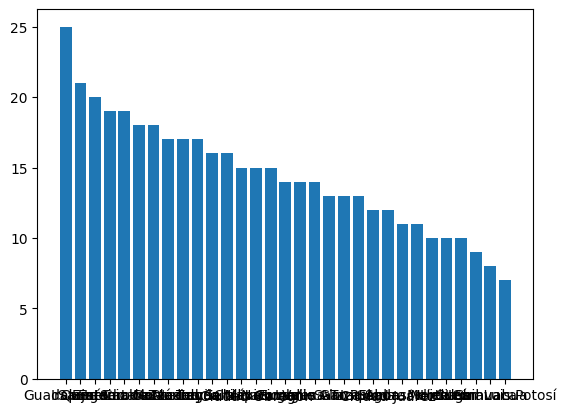

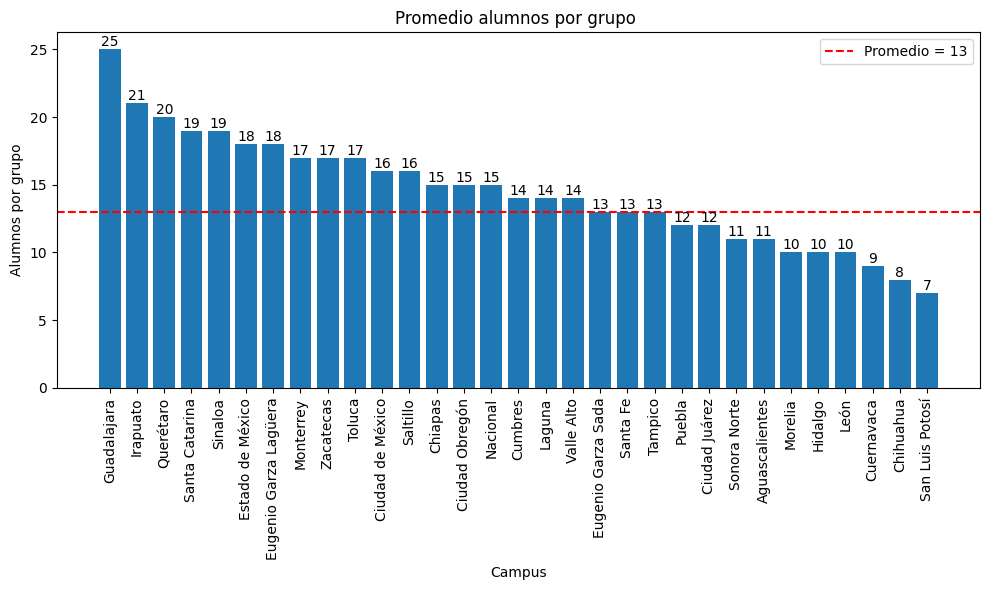

In [313]:
import pandas as pd
import matplotlib.pyplot as plt

reporte = reporte.sort_values(by='alumnos por grupo', ascending=False)
bars = plt.bar(reporte['campus'], reporte['alumnos por grupo'])

# Crea la gráfica de barras
plt.figure(figsize=(10, 6))
plt.bar(reporte['campus'], reporte['alumnos por grupo'])
plt.xlabel('Campus')
plt.ylabel('Alumnos por grupo')
plt.title('Promedio alumnos por grupo ')
plt.xticks(rotation=90)  # Rotar las etiquetas del eje x para una mejor legibilidad
plt.axhline(y=13, color='red', linestyle='--', label='Promedio = 13')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')


# Muestra la gráfica
plt.tight_layout()
plt.legend() 
plt.show()
